Set up

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

train_data = pd.read_csv('/content/drive/MyDrive/wildfires_training.csv')
test_data = pd.read_csv('/content/drive/MyDrive/wildfires_test.csv')

X_train = train_data.drop(columns=['fire'])
y_train = train_data['fire']

X_test = test_data.drop(columns=['fire'])
y_test = test_data['fire']

RandomForestClassifier with default parameters:

Training Accuracy: 1.0000

Classification Report of Testing Results:
              precision    recall  f1-score   support

          no       1.00      1.00      1.00        75
         yes       1.00      1.00      1.00        79

    accuracy                           1.00       154
   macro avg       1.00      1.00      1.00       154
weighted avg       1.00      1.00      1.00       154

Testing Accuracy: 0.8200
Classification Report of Testing Results:
              precision    recall  f1-score   support

          no       0.76      0.86      0.81        22
         yes       0.88      0.79      0.83        28

    accuracy                           0.82        50
   macro avg       0.82      0.82      0.82        50
weighted avg       0.83      0.82      0.82        50



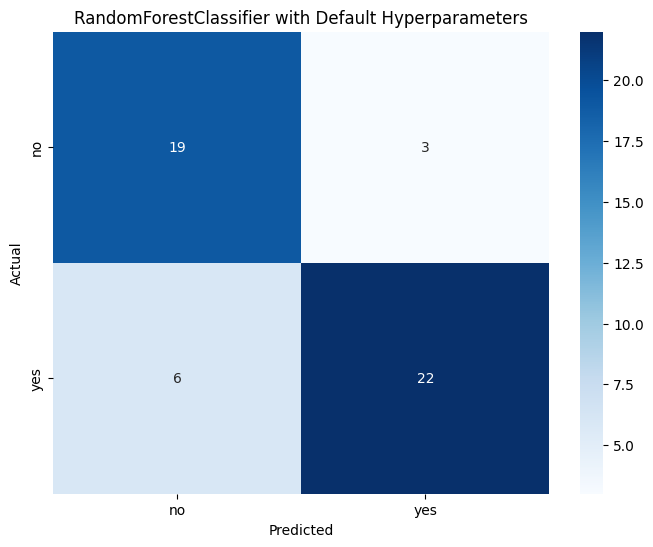

In [ ]:
# intialise the randomforestclassifier with a set random seed
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)

# train and get accuracy
train_predictions = rfc.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
train_report = classification_report(y_train, train_predictions)

print(f"Training Accuracy: {train_accuracy:.4f}\n")
print("Classification Report of Testing Results:")
print(train_report)

# test and get accuracy
test_predictions = rfc.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
test_report = classification_report(y_test, test_predictions)

print(f"Testing Accuracy: {test_accuracy:.4f}")
print("Classification Report of Testing Results:")
print(test_report)

# create a confusion matrix to visualise the data
cm = confusion_matrix(y_test, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('RandomForestClassifier with Default Hyperparametersk')
plt.show()

RandomForestClassifier with tuning:

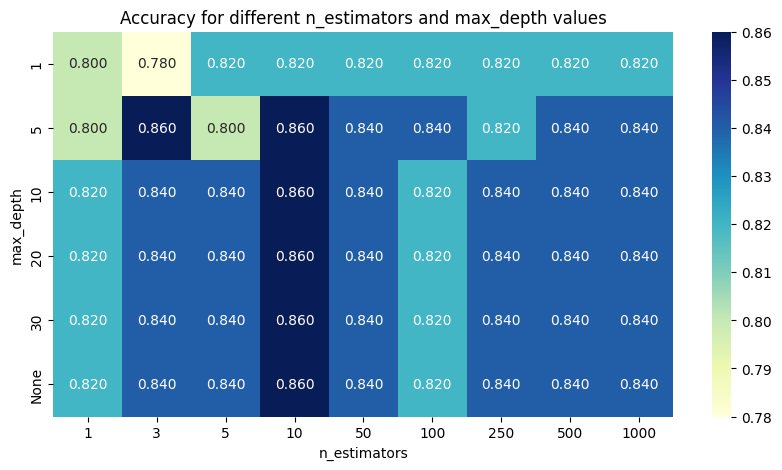

Best Accuracy: 0.860
Best n_estimators: 3
Best max_depth: 5


In [ ]:
# initialise a range of hyperparameters to loop over
n_estimators_range = [1, 3, 5, 10, 50, 100, 250, 500, 1000]
max_depth_range = [1, 5, 10, 20, 30, None]

# matrix to store the accuracy of each hyperparameter pair
accuracy_matrix = np.zeros((len(max_depth_range), len(n_estimators_range)))

# variable to track
best_accuracy = 0
best_n_estimators = None
best_max_depth = None

# looping over each hyperparam value
for i, max_depth in enumerate(max_depth_range):
    for j, n_estimators in enumerate(n_estimators_range):
        rfc = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=0)
        rfc.fit(X_train, y_train)

        y_pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_matrix[i, j] = accuracy

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_n_estimators = n_estimators
            best_max_depth = max_depth

# heatmap of accuracies
plt.figure(figsize=(10, 5))
sns.heatmap(accuracy_matrix, annot=True, fmt=".3f", cmap="YlGnBu",
            xticklabels=n_estimators_range,
            yticklabels=[str(depth) if depth is not None else "None" for depth in max_depth_range])
plt.title('Accuracy for different n_estimators and max_depth values')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

print(f"Best Accuracy: {best_accuracy:.3f}")
print(f"Best n_estimators: {best_n_estimators}")
print(f"Best max_depth: {best_max_depth}")


Pre-process: encode categorical variables

In [13]:
encoder = OneHotEncoder(drop='first', sparse_output=False)

y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# rename y_train and y_test for convenience
y_train = y_train_encoded
y_test = y_test_encoded

SVC classifier with default params

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Training Accuracy: 0.5130

Classification Report of Training Results:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        75
         1.0       0.51      1.00      0.68        79

    accuracy                           0.51       154
   macro avg       0.26      0.50      0.34       154
weighted avg       0.26      0.51      0.35       154

Testing Accuracy: 0.5600
Classification Report of Testing Results:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.56      1.00      0.72        28

    accuracy                           0.56        50
   macro avg       0.28      0.50      0.36        50
weighted avg       0.31      0.56      0.40        50



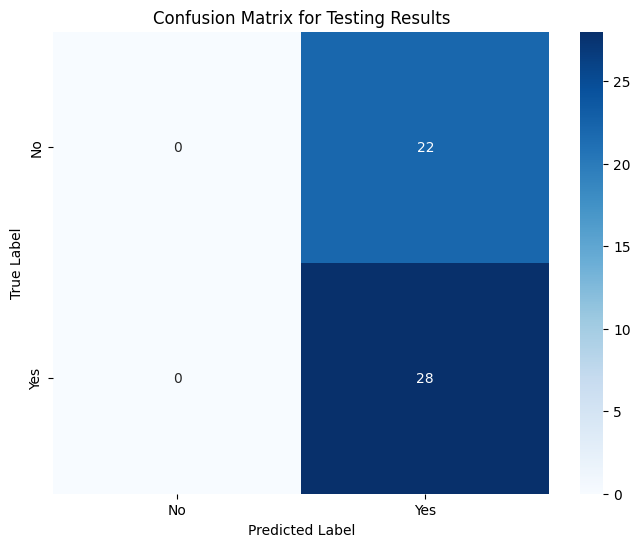

In [14]:
# svc with default params
svc = SVC()
svc.fit(X_train, y_train)

# get training accuracy
svc_train_predictions = svc.predict(X_train)
svc_train_accuracy = accuracy_score(y_train, svc_train_predictions)
svc_train_report = classification_report(y_train, svc_train_predictions)

print(f"Training Accuracy: {svc_train_accuracy:.4f}\n")
print("Classification Report of Training Results:")
print(svc_train_report)

# get testing accuracy
svc_test_predictions = svc.predict(X_test)
svc_test_accuracy = accuracy_score(y_test, svc_test_predictions)
svc_test_report = classification_report(y_test, svc_test_predictions)

print(f"Testing Accuracy: {svc_test_accuracy:.4f}")
print("Classification Report of Testing Results:")
print(svc_test_report)

# confusino matrix of the testing accuracy
cm = confusion_matrix(y_test, svc_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No', 'Yes'],
            yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Testing Results')
plt.show()

SVC with hyperparameter tuning

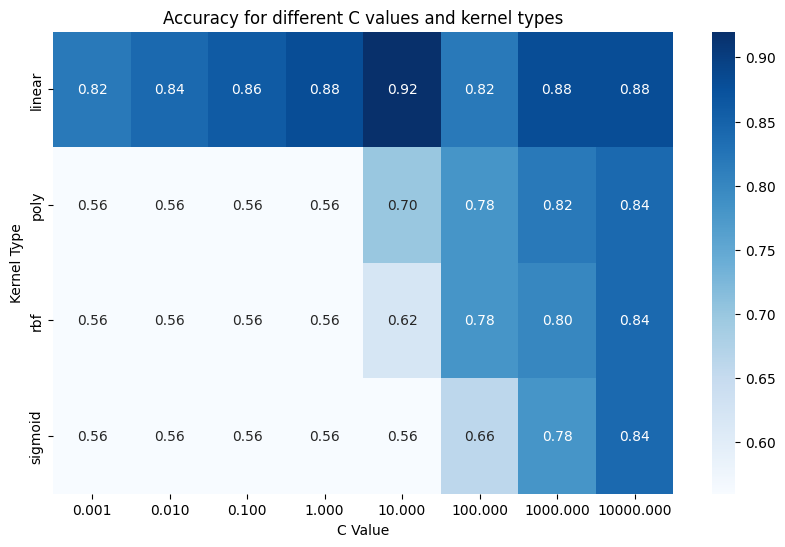

Best Accuracy: 0.920
Best C: 10.000
Best Kernel: linear


In [15]:
# initialise a range of hyperparameters to loop over
C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
kernel_types = ['linear', 'poly', 'rbf', 'sigmoid']

# matrix to store the accuracy of each hyperparameter pair
accuracy_matrix = np.zeros((len(kernel_types), len(C_values)))

# variables to track the best accuracy and corresponding hyperparameters
best_accuracy = 0
best_C = None
best_kernel = None

# looping over each hyperparameter value
for i, kernel in enumerate(kernel_types):
    for j, C in enumerate(C_values):
        svc = SVC(C=C, kernel=kernel)
        svc.fit(X_train, y_train)

        svc_test_predictions = svc.predict(X_test)
        accuracy = accuracy_score(y_test, svc_test_predictions)
        accuracy_matrix[i, j] = accuracy

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_C = C
            best_kernel = kernel

# heatmap of accuracies
plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=[f"{C:.3f}" for C in C_values],
            yticklabels=kernel_types)
plt.title('Accuracy for different C values and kernel types')
plt.xlabel('C Value')
plt.ylabel('Kernel Type')
plt.show()

print(f"Best Accuracy: {best_accuracy:.3f}")
print(f"Best C: {best_C:.3f}")
print(f"Best Kernel: {best_kernel}")